<a href="https://colab.research.google.com/github/nhanphm/embryos/blob/main/B%E1%BA%A3n_sao_c%E1%BB%A7a_Yolov3_Embryos_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mount with your Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Setup darknet environment

In [ ]:
# check whether GPU is provided
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0


In [ ]:
import os

path = "/content/drive/MyDrive/LuanVan_Embryos_segment"
os.chdir(path)

# remove the existing folder if have
#!rm -r darknet_for_colab

# download and compile darknet_for_colab
#!git clone https://github.com/phamdinhkhanh/darknetGoogleColab.git

%cd darknetGoogleColab

!ls

# phân quyền execute module darknet
!chmod +x ./darknet

/content/drive/MyDrive/Colab Notebooks/dataset/LuanVan_Embryos_segment/darknetGoogleColab
3rdparty		  json_mjpeg_streams.sh
appveyor.yml		  LICENSE
backup			  Makefile
bad_label.list		  net_cam_v3.sh
build			  obj
build.ps1		  obj.data
build.sh		  object_detection_yolo.py
cfg			  out1.avi
chart.png		  out.avi
classes.names		  output.mp4
cmake			  plotTrainLoss.py
CMakeLists.txt		  README.md
CMakeSettings.json	  result.txt
darknet			  scripts
darknet53.conv.74	  src
DarknetConfig.cmake.in	  test-embryos
darknetGoogleColab.ipynb  test.txt
darknet.py		  train.txt
darknet_video.py	  _travis.yml
data			  video_v2.sh
data_embryos		  video_yolov3.sh
detectyolo.py		  yolov3-5c-5000-max-steps.cfg
_gitignore		  yolov3-5c.log
image_yolov2.sh		  yolov3-tiny.cfg
image_yolov3.sh		  yolov3-tiny.log
include


In [ ]:
#Download yolov3-tiny
!wget https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3-tiny.cfg

--2021-02-24 06:54:23--  https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3-tiny.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1915 (1.9K) [text/plain]
Saving to: ‘yolov3-tiny.cfg’

yolov3-tiny.cfg     100%[===================>]   1.87K  --.-KB/s    in 0.001s  

2021-02-24 06:54:24 (2.63 MB/s) - ‘yolov3-tiny.cfg’ saved [1915/1915]

--2021-02-24 06:54:24--  https://pjreddie.com/media/files/yolov3-tiny.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35434956 (34M) [application/octet-stream]
Saving to: ‘yolov3-tiny.weights’

yolov3-tiny.weights 100%[===================>]  33.79M  30.2MB/s    in 

In [ ]:
# Config obj.data config file
!echo classes=1 > obj.data
!echo train=train.txt >> obj.data
!echo valid=val.txt >> obj.data
!echo names=classes.names >> obj.data
!echo backup=backup >> obj.data

In [ ]:
os.path.exists("obj.data")
os.path.exists("yolov3-tiny.cfg")


True

In [ ]:
#create train/val txt (list tập tin dùng training)
import glob2
import numpy as np

all_files = []
for ext in ["*.png", "*.jpeg", "*.jpg"]:
  images = glob2.glob(os.path.join("data_embryos", ext))
  all_files += images

rand_idx = np.random.randint(0, len(all_files), 20)

# Create train.txt
with open("train.txt", "w") as f:
  for idx in np.arange(len(all_files)):
    # if idx not in rand_idx:
    f.write(all_files[idx]+'\n')

# Create valid.txt
with open("val.txt", "w") as f:
  for idx in np.arange(len(all_files)):
    if idx in rand_idx:
      f.write(all_files[idx]+'\n')

In [ ]:
#create test txt (list tập tin dùng test)
import glob2
import numpy as np

all_files = []
for ext in ["*.png", "*.jpeg", "*.jpg"]:
  images = glob2.glob(os.path.join("test-embryos/image/", ext))
  all_files += images

# Create train.txt
with open("test.txt", "w") as f:
  for idx in np.arange(len(all_files)):
    f.write(all_files[idx]+'\n')

In [ ]:
#download files
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()
  
  
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)
      
def download(path):
  from google.colab import files
  files.download(path)

In [ ]:
!./darknet detector train obj.data yolov3-tiny.cfg darknet53.conv.74 -dont_show

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
Loaded: 0.000039 seconds

 535: 1.615783, 1.596840 avg loss, 0.001000 rate, 0.938359 seconds, 34240 images
Loaded: 0.004478 seconds

 536: 1.521384, 1.589294 avg loss, 0.001000 rate, 0.949161 seconds, 34304 images
Loaded: 0.000030 seconds

 537: 1.399810, 1.570346 avg loss, 0.001000 rate, 0.945698 seconds, 34368 images
Loaded: 0.000066 seconds

 538: 1.439245, 1.557235 avg loss, 0.001000 rate, 0.930246 seconds, 34432 images
Loaded: 0.000037 seconds

 539: 1.475598, 1.549072 avg loss, 0.001000 rate, 0.955376 seconds, 34496 images
Loaded: 0.000041 seconds

 540: 1.351967, 1.529361 avg loss, 0.001000 rate, 0.937058 seconds, 34560 images
Resizing
384 x 384 
 try to allocate additional workspace_size = 95.26 MB 
 CUDA allocate done! 
Loaded: 0.000043 seconds

 541: 1.481872, 1.524612 avg loss, 0.001000 rate, 0.419621 seconds, 34624 images
Loaded: 0.169310 seconds

 542: 1.396890, 1.511840 avg loss, 0.001000 rate, 0.409120 seconds, 346

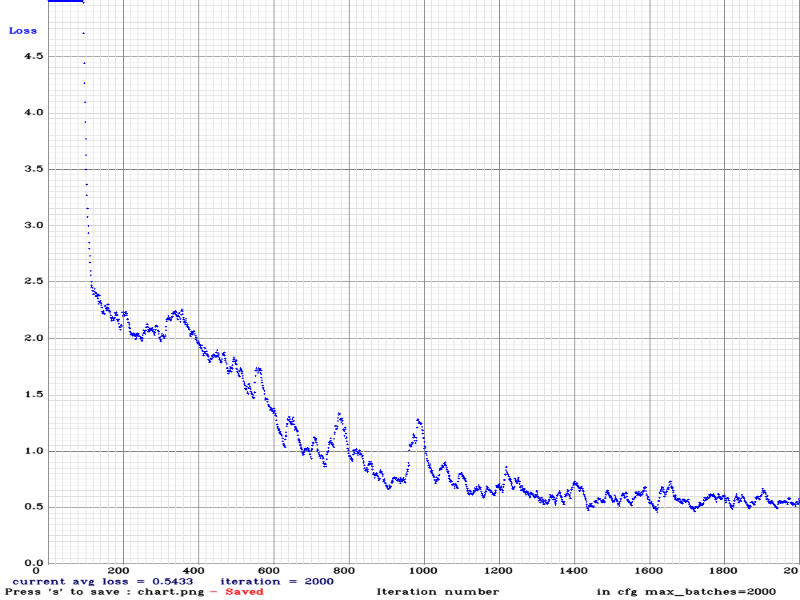

In [ ]:
#Show training result
from google.colab.patches import cv2_imshow
import cv2
img = cv2.imread('chart.png', cv2.IMREAD_UNCHANGED)
img = cv2.resize(img, (800, 600)) 
cv2_imshow(img)

In [ ]:
!./darknet detector demo obj.data yolov3-tiny.cfg backup/yolov3-tiny_final.weights ../../N3_convert/output20.mp4 -dont_show -i 0 -out_filename out1.avi


Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.

embryos: 50% 

FPS:135.7

 cvWriteFrame 
Objects:

embryos: 43% 

FPS:143.5

 cvWriteFrame 
Objects:

embryos: 59% 

FPS:127.1

 cvWriteFrame 
Objects:

embryos: 52% 

FPS:126.6

 cvWriteFrame 
Objects:

embryos: 58% 

FPS:123.7

 cvWriteFrame 
Objects:

embryos: 63% 

FPS:149.3

 cvWriteFrame 
Objects:

embryos: 60% 

FPS:144.6

 cvWriteFrame 
Objects:

embryos: 62% 

FPS:110.5

 cvWriteFrame 
Objects:

embryos: 60% 

FPS:119.7

 cvWriteFrame 
Objects:

embryos: 64% 

FPS:140.4

 cvWriteFrame 
Objects:

embryos: 52% 

FPS:108.0

 cvWriteFrame 
Objects:

embryos: 57% 

FPS:122.6

 cvWriteFrame 
Objects:

embryos: 44% 

FPS:143.3

 cvWriteFrame 
Objects:

embryos: 57% 

FPS:133.9

 cvWriteFrame 
Objects:

embryos: 47% 

FPS:116.0

 cvWriteFrame 
Objects:

embryos: 55% 

FPS:116.3

 cvWriteFrame 
Objects:

embryos: 45% 

FPS:137.9

 cvWriteFrame 
Objects:

embryos: 47% 

FPS:140.5

 cvWriteFrame 
Objects:

embryos: 57% 

FPS:133.7

In [ ]:
# Replace classes_id của embryos trong dữ liệu test (15 -> 1)

import glob2
import numpy as np

all_files = []
for ext in ["*.txt"]:
  images = glob2.glob(os.path.join("test-embryos/image/", ext))
  all_files += images

for filename in all_files:
  with open(os.path.join(os.getcwd(), filename), 'r') as file :
    filedata = file.read()
    
  filedata = filedata.replace('15 ', '0 ')
  
  with open(os.path.join(os.getcwd(), filename), 'w') as file:
      file.write(filedata)


In [ ]:
#Hàm test mAP và average IoU trên tập test (dùng tập test riêng biệt) (tiny-Yolov3)
!./darknet detector map obj.data yolov3-tiny.cfg backup/yolov3-tiny_final.weights -dont_show -ext_output < test.txt > result_tinyYolo.txt

layer     filters    size              input                output
   0 conv     16  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  16 0.150 BF
   1 max          2 x 2 / 2   416 x 416 x  16   ->   208 x 208 x  16 0.003 BF
   2 conv     32  3 x 3 / 1   208 x 208 x  16   ->   208 x 208 x  32 0.399 BF
   3 max          2 x 2 / 2   208 x 208 x  32   ->   104 x 104 x  32 0.001 BF
   4 conv     64  3 x 3 / 1   104 x 104 x  32   ->   104 x 104 x  64 0.399 BF
   5 max          2 x 2 / 2   104 x 104 x  64   ->    52 x  52 x  64 0.001 BF
   6 conv    128  3 x 3 / 1    52 x  52 x  64   ->    52 x  52 x 128 0.399 BF
   7 max          2 x 2 / 2    52 x  52 x 128   ->    26 x  26 x 128 0.000 BF
   8 conv    256  3 x 3 / 1    26 x  26 x 128   ->    26 x  26 x 256 0.399 BF
   9 max          2 x 2 / 2    26 x  26 x 256   ->    13 x  13 x 256 0.000 BF
  10 conv    512  3 x 3 / 1    13 x  13 x 256   ->    13 x  13 x 512 0.399 BF
  11 max          2 x 2 / 1    13 x  13 x 512   ->    13 x  13 x 512 0.000 

In [ ]:
!./darknet detector test obj.data yolov3-tiny.cfg backup/yolov3-tiny_final.weights test-embryos/image/300.jpg

layer     filters    size              input                output
   0 conv     16  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  16 0.150 BF
   1 max          2 x 2 / 2   416 x 416 x  16   ->   208 x 208 x  16 0.003 BF
   2 conv     32  3 x 3 / 1   208 x 208 x  16   ->   208 x 208 x  32 0.399 BF
   3 max          2 x 2 / 2   208 x 208 x  32   ->   104 x 104 x  32 0.001 BF
   4 conv     64  3 x 3 / 1   104 x 104 x  32   ->   104 x 104 x  64 0.399 BF
   5 max          2 x 2 / 2   104 x 104 x  64   ->    52 x  52 x  64 0.001 BF
   6 conv    128  3 x 3 / 1    52 x  52 x  64   ->    52 x  52 x 128 0.399 BF
   7 max          2 x 2 / 2    52 x  52 x 128   ->    26 x  26 x 128 0.000 BF
   8 conv    256  3 x 3 / 1    26 x  26 x 128   ->    26 x  26 x 256 0.399 BF
   9 max          2 x 2 / 2    26 x  26 x 256   ->    13 x  13 x 256 0.000 BF
  10 conv    512  3 x 3 / 1    13 x  13 x 256   ->    13 x  13 x 512 0.399 BF
  11 max          2 x 2 / 1    13 x  13 x 512   ->    13 x  13 x 512 0.000 

In [ ]:
#!ffmpeg -i out1.avi output.mp4

from IPython.display import HTML
from base64 import b64encode
mp4 = open('output.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

# **Test model**

In [ ]:
#Define path:
weight_path="/content/drive/MyDrive/Colab Notebooks/dataset/yolo/darknetGoogleColab/backup/yolov3-tiny_final.weights"
cfg_path="/content/drive/MyDrive/Colab Notebooks/dataset/yolo/darknetGoogleColab/yolov3-tiny.cfg"
class_path="/content/drive/MyDrive/Colab Notebooks/dataset/yolo/darknetGoogleColab/classes.names"
video_path="/content/drive/MyDrive/Colab Notebooks/dataset/N3_convert/output9.mp4"

# import libraries of python OpenCV  
import cv2
import numpy as np
import time

# Load Yolo
net = cv2.dnn.readNet(weight_path, cfg_path)
classes = []
with open(class_path, "r") as f:
    classes = [line.strip() for line in f.readlines()]
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

# capture frames from a camera  
cap = cv2.VideoCapture(video_path)  
frame_count = 0
batch_s = 10
#writer = None
frame_l = []
blank = []
embryos = []

# loop runs if capturing has been initialized. 
while 1:  
    start_time = time.time()
    # reads frames from a camera  
    ret, img = cap.read()  
    # Detects embryos of different sizes in the input image  
    #img = cv2.resize(frame, None, fx=0.4, fy=0.4)
    frame_count +=1

    frame_l.append(frame_count)
    height, width, channels = img.shape
    # Detecting objects
    blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
    net.setInput(blob)
    outs = net.forward(output_layers)
    
    class_ids = []
    confidences = []
    boxes = []
    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5:
                # Object detected
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)
                # Rectangle coordinates
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)
                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)
    
    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
    font = cv2.FONT_HERSHEY_PLAIN
    embryos.append(len(indexes))
    
#    if len(indexes) > 0:
#        for i in range(len(boxes)):
#            if i in indexes:
#                x, y, w, h = boxes[i]
#                label = str(classes[class_ids[i]])
#                color = colors[i]
#                cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
#                cv2.putText(img, label, (x, y + 30), font, 1, color, 2)
  
    # Display an image in a window  
    #cv2.imshow('img',img) 
    
    # check if the video writer is None
#    if writer is None:
        # initialize our video writer
#        fourcc = cv2.VideoWriter_fourcc(*"MJPG")
#        writer = cv2.VideoWriter("out.mpg", fourcc, 25, (width, height), True)

    # write the output frame to disk
#    writer.write(frame)
    end_time = time.time()
    print ("Frame: ", frame_count, " -> count: ", len(indexes), " -> Time: ", (end_time-start_time) , "s")
    # Wait for Esc key to stop  
    k = cv2.waitKey(30) & 0xff
    if k == 27:  
        break
  
# Close the window  
cap.release()  
#writer.release()
# De-allocate any associated memory usage  
cv2.destroyAllWindows()

Frame:  1  -> count:  0  -> Time:  0.20081710815429688 s
Frame:  2  -> count:  1  -> Time:  0.15946221351623535 s
Frame:  3  -> count:  1  -> Time:  0.16588258743286133 s
Frame:  4  -> count:  1  -> Time:  0.15613031387329102 s
Frame:  5  -> count:  0  -> Time:  0.17091083526611328 s
Frame:  6  -> count:  0  -> Time:  0.1714324951171875 s
Frame:  7  -> count:  1  -> Time:  0.16581344604492188 s
Frame:  8  -> count:  0  -> Time:  0.15813231468200684 s
Frame:  9  -> count:  0  -> Time:  0.1623225212097168 s
Frame:  10  -> count:  0  -> Time:  0.15685057640075684 s
Frame:  11  -> count:  0  -> Time:  0.16967439651489258 s
Frame:  12  -> count:  1  -> Time:  0.15496087074279785 s
Frame:  13  -> count:  1  -> Time:  0.16759109497070312 s
Frame:  14  -> count:  1  -> Time:  0.16407489776611328 s
Frame:  15  -> count:  1  -> Time:  0.16420435905456543 s
Frame:  16  -> count:  0  -> Time:  0.1593790054321289 s
Frame:  17  -> count:  0  -> Time:  0.16514205932617188 s
Frame:  18  -> count:  0  

KeyboardInterrupt: ignored